In [1]:
import scanpy as sc
import anndata2ri 
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbocity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

Python(66991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(66992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(66993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/var/folders/s3/5lhjnf551_s3brzzdbtlj7fw0000gn/T/ipykernel_64076/3790980907.py:20: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [2]:
%%R
library(scry)


In [3]:
adata = sc.read("normalization_0.h5ad")
adata

/Users/kostisfortounas/myenv/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 37407 × 34890
    obs: 'SubID', 'Channel', 'Brain_bank', 'round_num', 'poolID', 'Sex', 'Age', 'Dx_AD', 'Ethnicity', 'pH', 'PMI', 'class', 'subclass', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_pca_regressed_harmony', 'X_umap'
    layers: 'log1p_norm', 'scran_normalization'

In [4]:
ro.globalenv["adata"] =adata


In [5]:
%%R
sce = devianceFeatureSelection(adata, assay="X")

In [6]:
binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T

In [7]:
idx = binomial_deviance.argsort()[-4000:]
mask = np.zeros(adata.var_names.shape, dtype=bool)
mask[idx] = True

adata.var["highly_deviant"] = mask
adata.var["binomial_deviance"] = binomial_deviance

In [8]:
sc.pp.highly_variable_genes(adata, layer="scran_normalization")

/Users/kostisfortounas/myenv/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [9]:
print(adata.layers.keys())

KeysView(Layers with keys: log1p_norm, scran_normalization)


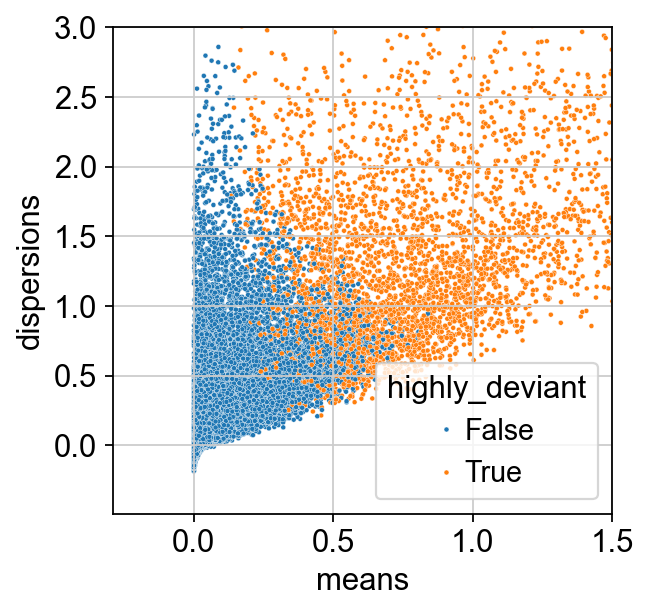

In [10]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [11]:
adata.write("feature_selection_0.h5ad")